# Analyse des données
---
Dans cette partie, nous nous chargerons de faire une analyse exploratoire, statistique ainsi que d'entrainer un model de ML
- Analyse Exploratoire 
- Analyse Statistique
- Model de Machine Learning 
---
Nous utiliserons pour cela pySpark pour l'analyse de ces données.

## Bibliothèques et Librairies Utiles

- **1. `pandas`** : Permet la manipulation et l'analyse de données tabulaires (DataFrames), ainsi que l'import/export de fichiers (CSV, Excel, etc.).

- **2. `os`** : Interagit avec le système d'exploitation, permettant de manipuler des fichiers, répertoires, et d'exécuter des commandes système.

- **3. `seaborn`** : Bibliothèque de visualisation basée sur `matplotlib`, facilitant la création de graphiques complexes et esthétiques comme des heatmaps et des boxplots.

- **4. `matplotlib.pyplot`** : Permet la création de graphiques (courbes, barres, histogrammes) et leur personnalisation.

- **5. `sklearn.preprocessing.StandardScaler`** : Normalise les données en ajustant la moyenne à 0 et l'écart-type à 1, ce qui est essentiel pour les modèles d'apprentissage automatique.

- **6. `scipy.stats`** : Fournit des fonctions statistiques, comme la distribution uniforme, utilisée pour définir des plages d'hyperparamètres dans la recherche aléatoire.


In [97]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importons le dataset et affichons les 5 premieres lignes du dataset

In [98]:
dataset_name = "Nasa_POWER_dataset_cleaned.csv"
df_init = pd.read_csv(dataset_name)
df_init['date'] = pd.to_datetime(df_init['date'])
df = df_init.copy()
df.head(5)

,date,temperature_humide,direction_vent,temperature_air,pression,humidite_relative,composante_est_ouest_vent,temperature_point_rosee,humidite_specifique,intensite_vent,vitesse_vent,precipitations_corrigees
0,2022-01-01,21.41,57.7,25.52,101.26,60.78,-4.70,17.30,12.26,5.74,-2.97,0.00
1,2022-01-02,21.14,49.3,25.01,101.29,62.47,-4.53,17.27,12.23,6.30,-3.89,0.00
2,2022-01-03,20.66,43.1,24.54,101.21,62.79,-3.29,16.78,11.86,5.01,-3.51,0.00
3,2022-01-04,20.69,42.8,24.44,101.11,64.11,-2.41,16.95,12.04,3.73,-2.61,0.00
4,2022-01-05,20.70,52.0,24.35,101.20,64.04,-3.58,17.04,12.08,4.82,-2.80,0.01


Taille du dataset

In [99]:
df.shape

(731, 12)

Type des données

In [100]:
df.dtypes

date                         datetime64[ns]
temperature_humide                  float64
direction_vent                      float64
temperature_air                     float64
pression                            float64
humidite_relative                   float64
composante_est_ouest_vent           float64
temperature_point_rosee             float64
humidite_specifique                 float64
intensite_vent                      float64
vitesse_vent                        float64
precipitations_corrigees            float64
dtype: object

In [101]:
df['date'] = pd.to_datetime(df['date'])

Verification des valeurs manquantes
- on observe des valeurs manquantes dans le dataset au niveau de Precip Type
- Cependant, auniveau de la partie traitement, on a vue que le pourcentage de valeur manquante était négligeable (0%)
- On peut donc choisir de ne pas imputer et de directement supprimer les lignes


In [102]:
df.isnull().sum()

date                         0
temperature_humide           0
direction_vent               0
temperature_air              0
pression                     0
humidite_relative            0
composante_est_ouest_vent    0
temperature_point_rosee      0
humidite_specifique          0
intensite_vent               0
vitesse_vent                 0
precipitations_corrigees     0
dtype: int64

In [103]:
df = df.dropna()
df.isnull().sum()

date                         0
temperature_humide           0
direction_vent               0
temperature_air              0
pression                     0
humidite_relative            0
composante_est_ouest_vent    0
temperature_point_rosee      0
humidite_specifique          0
intensite_vent               0
vitesse_vent                 0
precipitations_corrigees     0
dtype: int64

Description Statistique

In [104]:
numeric_describe = df.describe()
numeric_describe = numeric_describe.drop('date', axis=1, errors='ignore')
numeric_describe

,temperature_humide,direction_vent,temperature_air,pression,humidite_relative,composante_est_ouest_vent,temperature_point_rosee,humidite_specifique,intensite_vent,vitesse_vent,precipitations_corrigees
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,23.100520,207.469220,24.963283,101.170137,80.500534,0.808605,21.237756,15.982873,5.115103,-3.023187,1.992394
min,16.320000,0.100000,17.850000,100.650000,50.740000,-7.150000,12.530000,9.090000,1.470000,-9.400000,0.000000
25%,20.105000,42.900000,22.470000,101.070000,77.280000,-0.880000,18.180000,12.985000,3.970000,-5.315000,0.000000
50%,23.410000,267.800000,25.800000,101.170000,82.740000,1.100000,21.680000,16.080000,5.100000,-3.460000,0.010000
75%,26.175000,329.200000,27.880000,101.270000,86.305000,2.690000,24.560000,19.195000,6.285000,-1.035000,1.430000
max,27.740000,360.000000,29.810000,101.710000,97.680000,8.050000,26.420000,21.480000,9.540000,7.970000,61.030000
std,3.202382,136.360695,3.230932,0.149236,8.858546,2.630436,3.465612,3.278172,1.553488,3.111214,5.732826


Description Statistiques des valeurs uniques

In [105]:
"""
categorielle_describe = df.select_dtypes(include='object').describe()
categorielle_describe"
"""

'\ncategorielle_describe = df.select_dtypes(include=\'object\').describe()\ncategorielle_describe"\n'

Visualisation
- Les histogrammes nous montre la répartition numérque du dataset et nous indique qu'il serait intéressant de mettre à l'échelle les données
- La matrice de corélation permet de voir les relations fortes ou faibles entre les variables 
- Nous pouvons visualiser l'évolution mensuel en fonction de la timeline
- Sachant que la relation la plus forte est celle de l'humidité et la température on peut éssayer placer le nuage de point de température et humidité
 

array([[<Axes: title={'center': 'temperature_humide'}>,
        <Axes: title={'center': 'direction_vent'}>,
        <Axes: title={'center': 'temperature_air'}>],
       [<Axes: title={'center': 'pression'}>,
        <Axes: title={'center': 'humidite_relative'}>,
        <Axes: title={'center': 'composante_est_ouest_vent'}>],
       [<Axes: title={'center': 'temperature_point_rosee'}>,
        <Axes: title={'center': 'humidite_specifique'}>,
        <Axes: title={'center': 'intensite_vent'}>],
       [<Axes: title={'center': 'vitesse_vent'}>,
        <Axes: title={'center': 'precipitations_corrigees'}>, <Axes: >]],
      dtype=object)

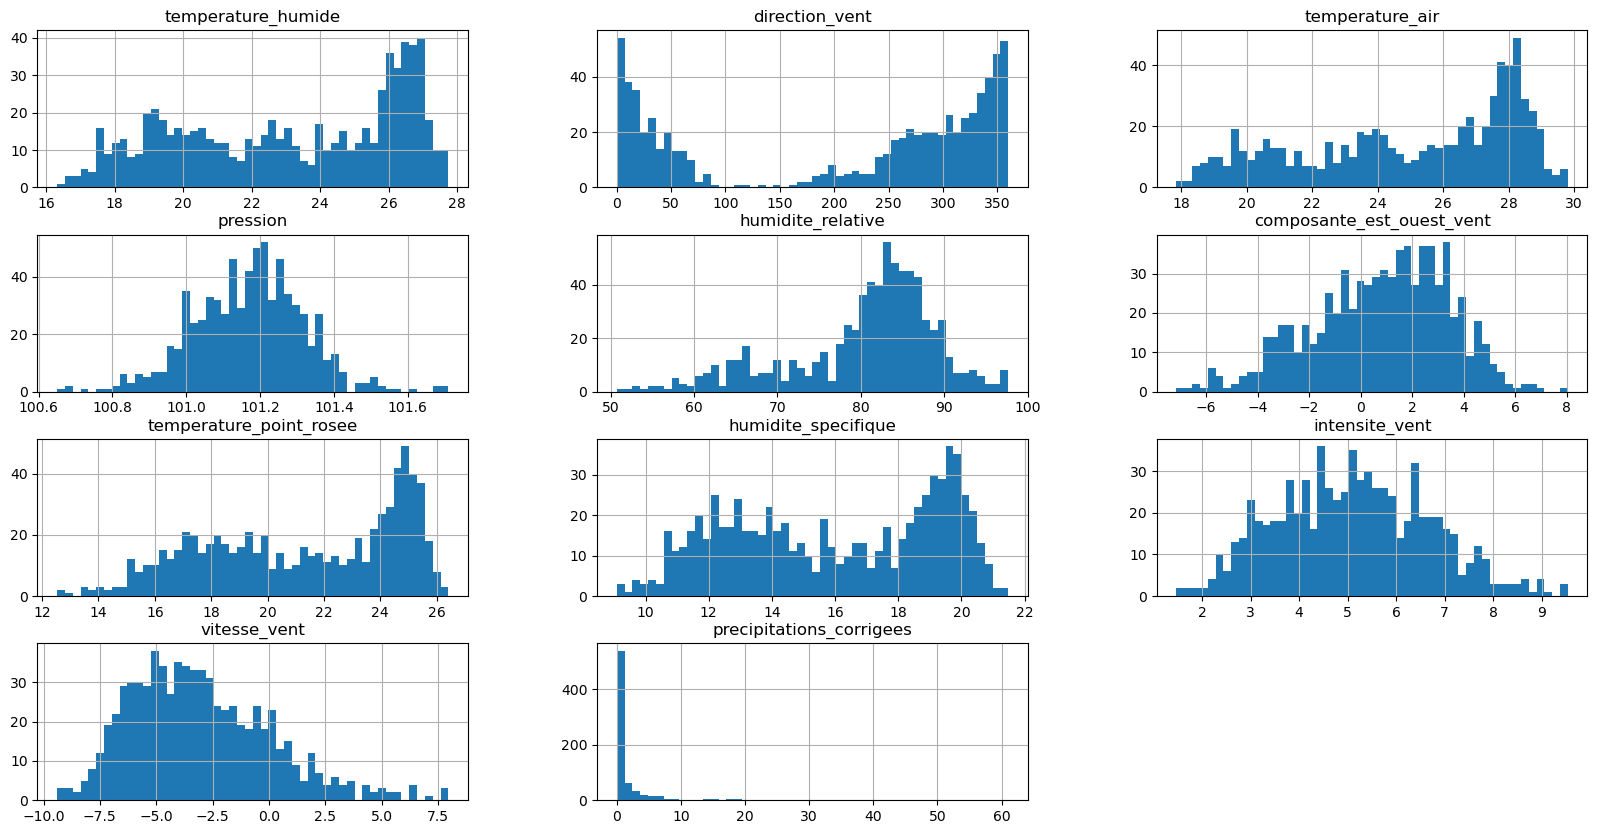

In [106]:
df[numeric_describe.columns].hist(bins=50, figsize=(20, 10))

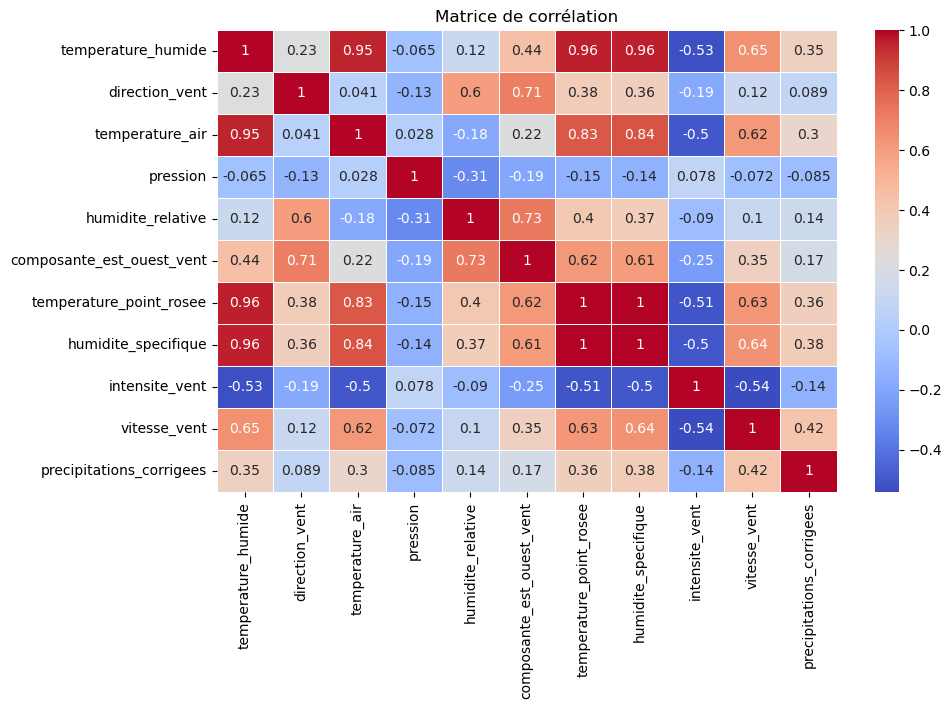

In [107]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_describe.columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [108]:
df.columns

Index(['date', 'temperature_humide', 'direction_vent', 'temperature_air',
       'pression', 'humidite_relative', 'composante_est_ouest_vent',
       'temperature_point_rosee', 'humidite_specifique', 'intensite_vent',
       'vitesse_vent', 'precipitations_corrigees'],
      dtype='object')

In [109]:
df.set_index('date', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_5128\2066634803.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[['temperature_humide', 'temperature_air', 'humidite_specifique','temperature_point_rosee']].resample('M').mean().plot(figsize=(12, 6))


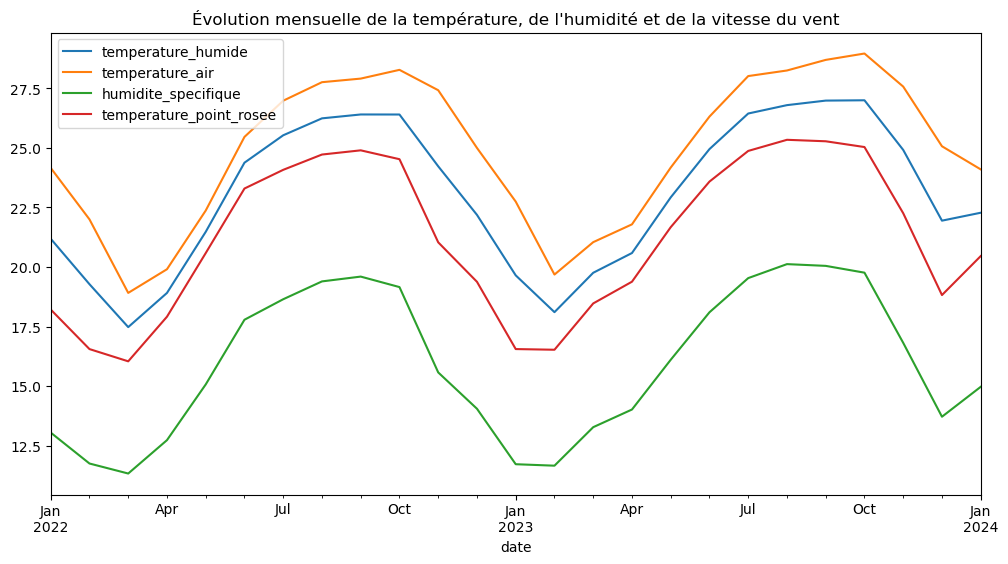

In [110]:

df[['temperature_humide', 'temperature_air', 'humidite_specifique','temperature_point_rosee']].resample('M').mean().plot(figsize=(12, 6))
plt.title("Évolution mensuelle de la température, de l'humidité et de la vitesse du vent")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5128\1264277299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[['temperature_air','humidite_relative']].resample('M').mean().plot(figsize=(12, 6))


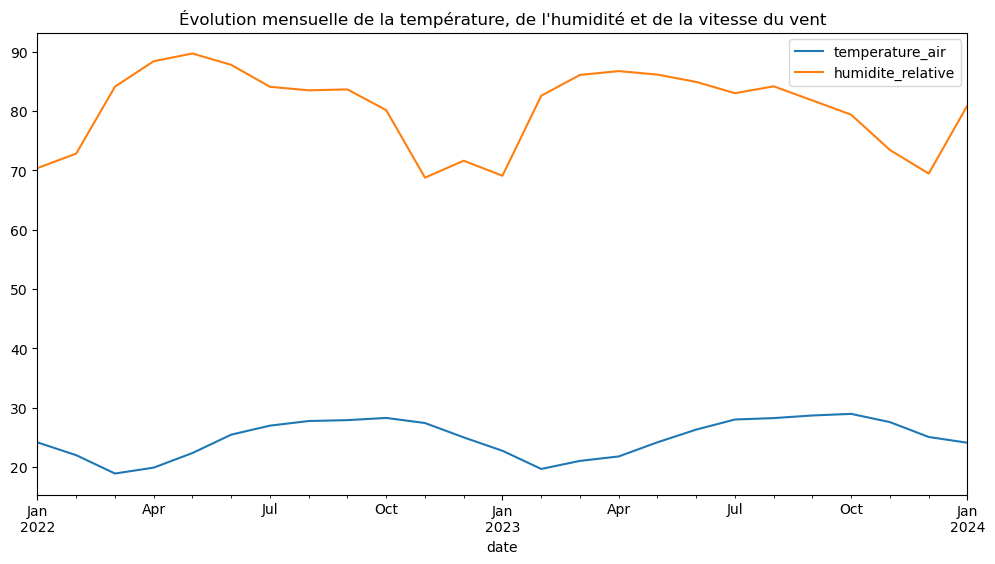

In [111]:
df[['temperature_air','humidite_relative']].resample('M').mean().plot(figsize=(12, 6))
plt.title("Évolution mensuelle de la température, de l'humidité et de la vitesse du vent")
plt.show()

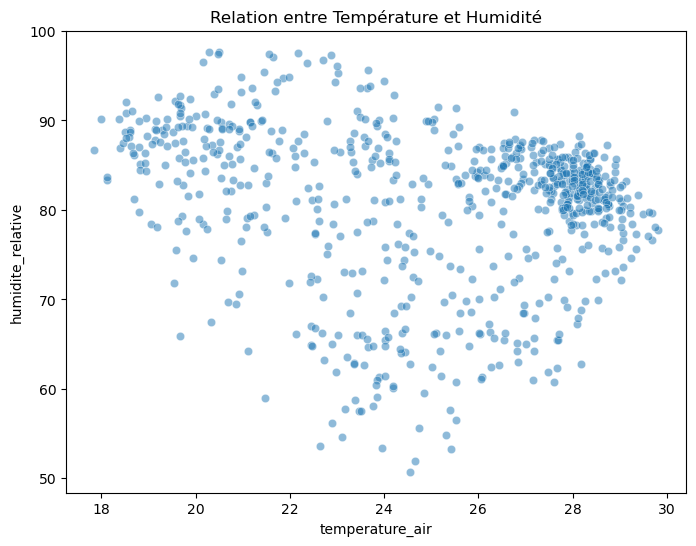

In [112]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['temperature_air'], y=df['humidite_relative'], alpha=0.5)
plt.xlabel("temperature_air")
plt.ylabel("humidite_relative")
plt.title("Relation entre Température et Humidité")
plt.show()

Création du modéle de machine Learning

Nous chercherons à prédire la température (Temperature (C)) en fonction de autres valeurs pertinent du dataset
- Summary        
- Precip Type
- Humidity  
- Wind Speed (km/h)  
- Wind Bearing (degrees)  
- Visibility (km)  
- Pressure (millibars) 

On commence donc par supprimer les variables non indispensables

In [113]:
"""
dataset_directory = "dataset/"
dataset_path = os.path.join(dataset_directory, "weather_history_cleaned.csv")
df = pd.read_csv(dataset_path)
df.dropna(subset=['Precip Type'], inplace=True)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
"""

'\ndataset_directory = "dataset/"\ndataset_path = os.path.join(dataset_directory, "weather_history_cleaned.csv")\ndf = pd.read_csv(dataset_path)\ndf.dropna(subset=[\'Precip Type\'], inplace=True)\ndf[\'Formatted Date\'] = pd.to_datetime(df[\'Formatted Date\'])\n'

In [114]:
df = df_init.copy()
df.columns

Index(['date', 'temperature_humide', 'direction_vent', 'temperature_air',
       'pression', 'humidite_relative', 'composante_est_ouest_vent',
       'temperature_point_rosee', 'humidite_specifique', 'intensite_vent',
       'vitesse_vent', 'precipitations_corrigees'],
      dtype='object')

In [115]:
df.drop(columns=['temperature_air', 'humidite_specifique','temperature_point_rosee'], inplace=True)

In [116]:
df.columns

Index(['date', 'temperature_humide', 'direction_vent', 'pression',
       'humidite_relative', 'composante_est_ouest_vent', 'intensite_vent',
       'vitesse_vent', 'precipitations_corrigees'],
      dtype='object')

Verification des valeurs manquantes

In [117]:
df.isnull().sum()

date                         0
temperature_humide           0
direction_vent               0
pression                     0
humidite_relative            0
composante_est_ouest_vent    0
intensite_vent               0
vitesse_vent                 0
precipitations_corrigees     0
dtype: int64

Vérifions les types
- pour la plupart des variables numériques, nous allons appliqué une mise à l'échelle avec un standard scaler
- pour les variables catégorielle, nous allons y appliqué un label encoder
- pour les variables la date, nous allons le convertir en bon format

In [118]:
df.dtypes

date                         datetime64[ns]
temperature_humide                  float64
direction_vent                      float64
pression                            float64
humidite_relative                   float64
composante_est_ouest_vent           float64
intensite_vent                      float64
vitesse_vent                        float64
precipitations_corrigees            float64
dtype: object

In [119]:
cat_cols = []
num_cols = df.columns[df.columns != 'date']

Mise en echelle

In [120]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,date,temperature_humide,direction_vent,pression,humidite_relative,composante_est_ouest_vent,intensite_vent,vitesse_vent,precipitations_corrigees
0,2022-01-01,-0.528256,-1.099083,0.602566,-2.227683,-2.095613,0.402530,0.017107,-0.347779
1,2022-01-02,-0.612626,-1.160727,0.803727,-2.036777,-2.030941,0.763256,-0.278800,-0.347779
2,2022-01-03,-0.762617,-1.206226,0.267297,-2.000629,-1.559213,-0.067702,-0.156577,-0.347779
3,2022-01-04,-0.753242,-1.208427,-0.403239,-1.851518,-1.224439,-0.892219,0.132897,-0.347779
4,2022-01-05,-0.750118,-1.140913,0.200244,-1.859425,-1.669537,-0.190091,0.071786,-0.346034


Encodage de la date

In [121]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Lundi = 0, Dimanche = 6
df['day_of_year'] = df['date'].dt.dayofyear
df['is_weekend'] = df['date'].dt.weekday >= 5  # True si c'est le weekend

df = df.drop(columns=['date'])
df.head()

,temperature_humide,direction_vent,pression,humidite_relative,composante_est_ouest_vent,intensite_vent,vitesse_vent,precipitations_corrigees,year,month,day,day_of_week,day_of_year,is_weekend
0,-0.528256,-1.099083,0.602566,-2.227683,-2.095613,0.402530,0.017107,-0.347779,2022,1,1,5,1,True
1,-0.612626,-1.160727,0.803727,-2.036777,-2.030941,0.763256,-0.278800,-0.347779,2022,1,2,6,2,True
2,-0.762617,-1.206226,0.267297,-2.000629,-1.559213,-0.067702,-0.156577,-0.347779,2022,1,3,0,3,False
3,-0.753242,-1.208427,-0.403239,-1.851518,-1.224439,-0.892219,0.132897,-0.347779,2022,1,4,1,4,False
4,-0.750118,-1.140913,0.200244,-1.859425,-1.669537,-0.190091,0.071786,-0.346034,2022,1,5,2,5,False


Label encoder

In [122]:
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transformer la colonne
    label_encoders[col] = le  
df.head()

,temperature_humide,direction_vent,pression,humidite_relative,composante_est_ouest_vent,intensite_vent,vitesse_vent,precipitations_corrigees,year,month,day,day_of_week,day_of_year,is_weekend
0,-0.528256,-1.099083,0.602566,-2.227683,-2.095613,0.402530,0.017107,-0.347779,2022,1,1,5,1,True
1,-0.612626,-1.160727,0.803727,-2.036777,-2.030941,0.763256,-0.278800,-0.347779,2022,1,2,6,2,True
2,-0.762617,-1.206226,0.267297,-2.000629,-1.559213,-0.067702,-0.156577,-0.347779,2022,1,3,0,3,False
3,-0.753242,-1.208427,-0.403239,-1.851518,-1.224439,-0.892219,0.132897,-0.347779,2022,1,4,1,4,False
4,-0.750118,-1.140913,0.200244,-1.859425,-1.669537,-0.190091,0.071786,-0.346034,2022,1,5,2,5,False


In [123]:
X = df.drop(columns=['humidite_relative'])
y = df['humidite_relative']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
model = LinearRegression()
param_dist = {'fit_intercept': [True, False]}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, random_state=42)

In [126]:
random_search.fit(X_train, y_train)

c:\Users\HP\anaconda3\envs\bda_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   random_state=42)

In [127]:
y_pred = random_search.best_estimator_.predict(X_test)

In [128]:
# Évaluer les performances
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Meilleurs paramètres du modèle:", random_search.best_params_)
print("Erreur absolue moyenne (MAE):", mae)
print("Erreur quadratique moyenne (MSE):", mse)
print("Racine de l'erreur quadratique moyenne (RMSE):", rmse)
print("R²:", r2)

Meilleurs paramètres du modèle: {'fit_intercept': True}
Erreur absolue moyenne (MAE): 0.4776781807117581
Erreur quadratique moyenne (MSE): 0.3751855398267448
Racine de l'erreur quadratique moyenne (RMSE): 0.3751855398267448
R²: 0.6815068798796186
